In [9]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tqdm

import datetime
now = datetime.datetime.now()


In [4]:
df = pd.read_pickle('data/arxiv-last50years-data.pickle')

In [5]:
df.shape

(134307, 10)

In [6]:
df.head()

,id,submitter,title,categories,abstract,update_date,authors_parsed,year,pdf_link,pages
0,0704.0001,Pavel Nadolsky,Calculation of prompt diphoton production cros...,High Energy Physics - Phenomenology,A fully differential calculation in perturba...,2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",2007,https://arxiv.org/pdf/0704.0001,37 page
1,0704.0007,Alejandro Corichi,Polymer Quantum Mechanics and its Continuum Limit,General Relativity and Quantum Cosmology,A rather non-standard quantum representation...,2008-11-26,"[[Corichi, Alejandro, ], [Vukasinac, Tatjana, ...",2007,https://arxiv.org/pdf/0704.0007,16 page
2,0704.0009,Paul Harvey,"The Spitzer c2d Survey of Large, Nearby, Inste...",Astrophysics,We discuss the results from the combined IRA...,2010-03-18,"[[Harvey, Paul, ], [Merin, Bruno, ], [Huard, T...",2007,https://arxiv.org/pdf/0704.0009,N/A
3,0704.0015,Christian Stahn,Fermionic superstring loop amplitudes in the p...,High Energy Physics - Theory,The pure spinor formulation of the ten-dimen...,2009-11-13,"[[Stahn, Christian, ]]",2007,https://arxiv.org/pdf/0704.0015,22 page
4,0704.0016,Li Tong,Lifetime of doubly charmed baryons,High Energy Physics - Phenomenology,"In this work, we evaluate the lifetimes of t...",2008-12-18,"[[Chang, Chao-Hsi, ], [Li, Tong, ], [Li, Xue-Q...",2008,https://arxiv.org/pdf/0704.0016,17 page


In [7]:
yearthresh = now.year+2
useless = []
for i in df.index:
    if int(df.year[i])>yearthresh:
        useless.append(i)
        
df.drop(useless, axis=0, inplace=True)

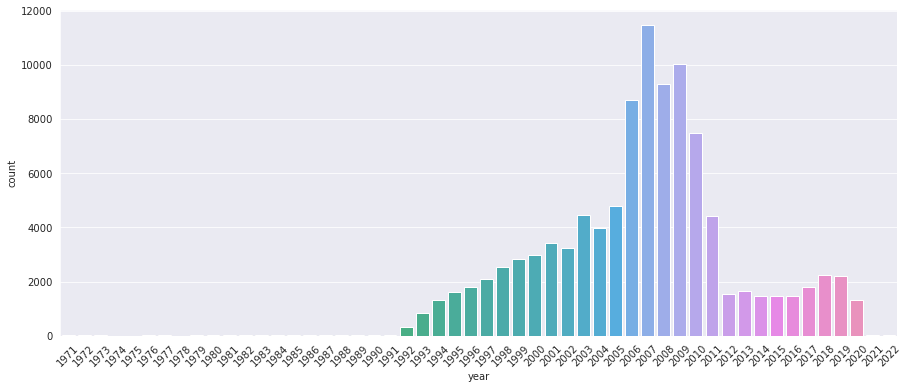

In [28]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
psns = sns.countplot(x="year",data=df, ax=ax)
plt.xticks(rotation=45)

plt.show()

In [48]:
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [62]:
data = [
    go.Bar(
        y=df['year'].value_counts(),
        x=df['year'].value_counts().keys(),
        orientation='v',
#         text="d",
    )]
layout = go.Layout(
    height=500,
    title='Publications per Year',
    hovermode='closest',
    xaxis=dict(title='Years', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]),
    yaxis=dict(title='Counts', ticklen=5, gridwidth=2),
    showlegend=True
)
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='Sector/ Area of Coaches - Combined')
# plotly.plot(fig, )
fig.show()

In [47]:
df.submitter.value_counts()[:10]

Salvatore Mele                    123
Jan Timmermans                    113
Preprints Libr/pam                102
Pamela Morehouse                   94
Brant M. Johnson                   93
Ashoke Sen                         87
Cms Collaboration                  85
Bernhard Rumpe                     84
William Jackson                    80
Collaboration Secretariat Opal     74
Name: submitter, dtype: int64

In [64]:
data = [
    go.Bar(
        y=df['categories'].value_counts(),
        x=df['categories'].value_counts().keys(),
        orientation='v',
        text="d",
    )]
layout = go.Layout(
    height=500,
    width=2000,
    title='Categories published in last 50 years',
    hovermode='closest',
    xaxis=dict(title='Categories', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]),
    yaxis=dict(title='Counts', ticklen=5, gridwidth=2),
    showlegend=True
)
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='Sector/ Area of Coaches - Combined')
# plotly.plot(fig, )
fig.show()